# Python Material zu Themenblock 5: Schließende Statistik

## t-Test

### P5.1 Quantil aus der t-Verteilung

Wir berechnen den kritischen Wert zu gegebenen Freiheitsgraden (degrees of freedom) und einem gegebenen Alpha-Fehler wie folgt (Beispiel im Vorlesungsskript S. 12):

In [1]:
import scipy.stats

alpha=0.05/2 # durch zwei teilen, wenn zweiseitig getestet wird
dfs = 18 # Freiheitsgrade
print("Das", 100*(1-alpha), "%-Quantil der t-Verteilung mit", dfs, "Freiheitsgraden ist:")
scipy.stats.t(df=18).ppf(1-alpha)

Das 97.5 %-Quantil der t-Verteilung mit 18 Freiheitsgraden ist:


2.10092204024096

### P5.2 p-Wert zu bekannter Teststatistik

Beispiel im Vorlesungsskript auf S. 15:

In [2]:
import scipy.stats

T = 1.77 # Teststatistik
dfs = 18 # Freiheitsgrade
print("Der p-Wert zur Teststatistik", T, "mit", dfs, "Freiheitsgraden ist:")
1-scipy.stats.t(df=dfs).cdf(T)

Der p-Wert zur Teststatistik 1.77 mit 18 Freiheitsgraden ist:


0.046831817520512686

### P5.3 Klassischer t-Test basierend auf csv-Datei mit Daten


Beispiel im Vorlesungsskript auf S. 19:

In [3]:
import pandas as pd
from scipy import stats
import statsmodels.stats.api as sms

senf = pd.read_csv('mustard.csv')
print(senf)
X1 = senf[senf['treatment'] == 'light']['response'] # adapt field to column names!
X2 = senf[senf['treatment'] == 'dark']['response'] # adapt field to column names!

print("t-Test:") # var_equal = True -> Default t-Test für gleiche Varianzen
print(stats.ttest_ind(X1, X2, equal_var=True, alternative = "greater")) # einseitig Anstieg
                                            # alternative = "less" für einseitig Abfall
                                            # alternative = "two-sided" für zweiseitig
        
print("Confidence Interval:")
print(sms.CompareMeans(sms.DescrStatsW(X1), 
                       sms.DescrStatsW(X2)).tconfint_diff(alpha=0.05, 
                                                          usevar="pooled",
                                                          alternative = "larger"))
                        # Achtung: hier heißt es usevar="pooled" für gleiche Varianzen
                        # Die Hypothesen sind:  "two-sided", "larger", "smaller"

   treatment  response
0      light        21
1      light        39
2      light        31
3      light        13
4      light        52
5      light        39
6      light        55
7      light        50
8      light        29
9      light        17
10      dark        22
11      dark        16
12      dark        20
13      dark        14
14      dark        32
15      dark        28
16      dark        36
17      dark        41
18      dark        17
19      dark        22
t-Test:
Ttest_indResult(statistic=1.7748239349298847, pvalue=0.04642010587805299)
1.7748239349298847
Confidence Interval:
(0.2250652639957771, inf)


0.04642010587805299

<font size="3"><div class="alert alert-warning"><b>Achtung:</b> <br> 
Für den Studiengang **Pharmazie** endet der Stoff der Veranstaltung hier! (Bis zum Ende durcharbeiten ist natürlich trotzdem empfohlen, aber prüfen werden wir Sie über die folgenden Inhalte nicht. Dies gilt ausschließlich für Studierende der Pharmazie.)
</div>

### P5.4 Welch-t-Test basierend auf csv-Datei mit Daten

Beispiel im Vorlesungsskript auf S. 22ff. Wir beginnen mit dem Boxplot. Der Boxplot sollte bei metrischen Daten vor jedem statistischen Test Standard sein:

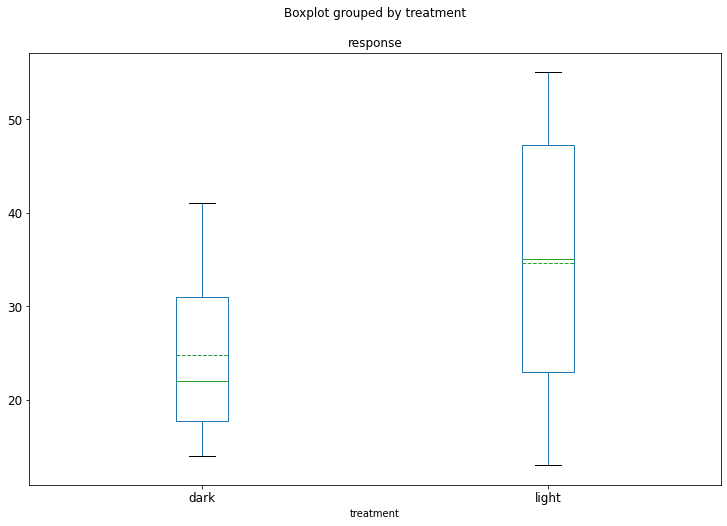

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

senf = pd.read_csv('mustard.csv')
fig, ax = plt.subplots(figsize=(12,8)) # hiermit vermeiden wir einen Überlapp der Überschrift
bp = senf.boxplot(column=['response'], by='treatment', 
                  fontsize='large', showmeans=True,meanline=True, 
                  grid = False, ax=ax)
plt.savefig('boxplot_mustard.pdf')

Jetzt folgt der Welch-t-Test:

In [7]:
import pandas as pd
from scipy import stats
import statsmodels.stats.api as sms

senf = pd.read_csv('mustard.csv')
X1 = senf[senf['treatment'] == 'light']['response'] # adapt field to column names!
X2 = senf[senf['treatment'] == 'dark']['response'] # adapt field to column names!

print("t-Test:") # var_equal = True -> Default t-Test für gleiche Varianzen
print(stats.ttest_ind(X1, X2, equal_var=False, alternative = "greater")) # einseitig Anstieg
                                            # alternative = "less" für einseitig Abfall
                                            # alternative = "two-sided" für zweiseitig

print("Confidence Interval:")
print(sms.CompareMeans(sms.DescrStatsW(X1), 
                       sms.DescrStatsW(X2)).tconfint_diff(alpha=0.05, 
                                                          usevar="unequal",
                                                          alternative = "larger"))
                        # Achtung: hier heißt es usevar="pooled" für gleiche Varianzen
                        # Die Hypothesen sind:  "two-sided", "larger", "smaller"

t-Test:
Ttest_indResult(statistic=1.774823934929885, pvalue=0.048191388751293196)
Confidence Interval:
(0.11504344374869646, inf)


### P5.5 Gepaarter t-Test

Beispiel im Vorlesungsskript auf S. 26ff. Wir beginnen wieder mit dem Boxplot:

             City  1972  1968
0            N.Y.  0.45  0.42
1            L.A.  0.50  0.50
2         Chicago  0.52  0.52
3    Philadelphia  0.45  0.45
4         Detroit  0.46  0.43
5   San Francisco  0.55  0.55
6          Boston  0.60  0.45
7           Pitt.  0.49  0.34
8       St. Louis  0.35  0.45
9     Connecticut  0.55  0.54
10     Wash. D.C.  0.52  0.42
11          Cinn.  0.53  0.51
12      Baltimore  0.57  0.49
13         Newark  0.53  0.54
14  Minn/St. Paul  0.59  0.50
15        Buffalo  0.64  0.58
16        Houston  0.50  0.49
17      Patterson  0.57  0.56
18         Dallas  0.64  0.63


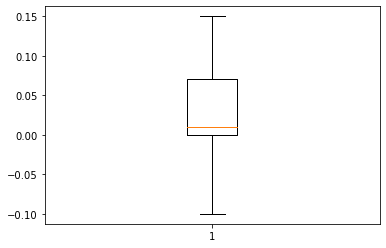

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

women = pd.read_csv('women.csv')
print(women)
diffs = women['1972'] - women['1968']

plt.boxplot(diffs)
plt.savefig('boxplot_women.pdf')

Es folgt der t-Test für gepaarte Stichproben:

In [9]:
from scipy import stats
import statsmodels.stats.api as sms
import pandas as pd

women = pd.read_csv('women.csv')
diffs = women['1972'] - women['1968']

T, p = stats.ttest_rel(women['1972'], women['1968'], alternative = "greater")
print("p-value is:", p)
print("Confidence interval is:")
sms.DescrStatsW(diffs).tconfint_mean(alternative="larger")

p-value is: 0.012176298793418172
Confidence interval is:


(0.009917895309433194, inf)

## P5.6 Wilcoxon-Test

Beispiel im Vorlesungsskript auf S. 31ff. Wir beginnen wieder mit dem Boxplot:

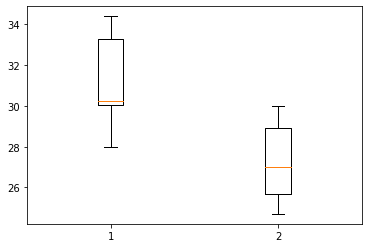

In [10]:
import matplotlib.pyplot as plt

pharmazie = [28, 30, 30.2, 30.3, 34.4, 34.3]
geographie = [24.7, 25.7, 27, 30, 28.9]

plt.boxplot([pharmazie, geographie])
plt.savefig('boxplot_arm.pdf')

Anschließend folgt der Wilcoxon-Test (hier benutzen wir die Funktion für den U-Test, aber der p-Wert ist identisch):

In [10]:
import scipy.stats as scs

pharmazie = [28, 30, 30.2, 30.3, 34.4, 34.3]
geographie = [24.7, 25.7, 27, 30, 28.9]

print(scs.mannwhitneyu(pharmazie, geographie, alternative='two-sided', 
                               use_continuity = False))

MannwhitneyuResult(statistic=27.5, pvalue=0.022173545386486773)


## $\chi^{2}$-Tests

### P5.7 $\chi^{2}$-Anpassungstest

Beispiel im Vorlesungsskript auf S. 39f:

In [12]:
import scipy.stats as scs
import numpy as np

obs = np.array([2, 12, 18, 43])
counts = obs.sum() # benötigen wir zur Berechnung der "erwarteten counts" in der nächsten Zeile
exp = np.array([counts*0.1733, counts*0.07, counts*0.08, counts*0.6767]) # hier werden "erwartete Counts" angegeben

scs.chisquare(obs, f_exp=exp)

### P5.8 $\chi^{2}$-Homogenitätstest

Beispiel im Vorlesungsskript auf S. 42:

In [9]:
import scipy.stats as scs
import numpy as np

barley = np.array([[41, 15], [8, 11]])

chi2, p, df, input_data = scs.chi2_contingency(barley, correction = False)
print("Chi2: " + str(chi2))
print("p-value: " + str(p))

Chi2: 6.0618640891868605
p-value: 0.013813180547006329
